# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
# Your code here.
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

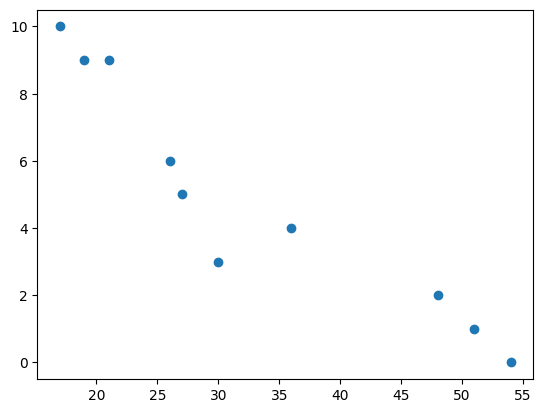

In [20]:
# Your code here.
x = student_data[['X']]
y = student_data[['Y']]

plt.scatter(x,y)
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# as age increases, the number of decreases

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [21]:
# Your response here.
#correlation:
print(student_data['X'].corr(student_data['Y']))

# a correlation closer to 1 means a strong positive 
# linear relationship between the two variables, this indicates a strong linear relationship
#between age and tardiness.

#covariance:
print(student_data['X'].cov(student_data['Y']))

# a negative covariance indicates that both variables change in opposite directions, one goes uo
# the other goes down, in this case, as age goes up, tardies go down.

-0.9391626886887122
-45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

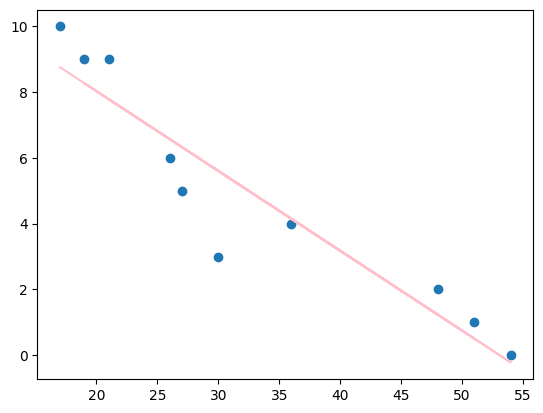

In [22]:
# Your response here.
model = linear_model.LinearRegression()
model.fit(x,y)

y_hat = model.intercept_+ model.coef_[0]* x

plt.plot(x.values, y_hat.values, c='pink')
plt.scatter(x,y)
plt.show()


Plot your regression model on your scatter plot.

In [ ]:
# Your code here.
# already did above

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [31]:
# Your response here. 
model.score(x,y)

#the sample is not so big so its risky to try and make predictions with this model. there is a tendancy
# but we can say for sure that this is not a coincidence.

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
# Import any libraries you may need & the data


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [30]:
# Your response here. 
cars = pd.read_csv('/Users/joananogueira/Desktop/Ironhack /Labs/Week4/lab-regression-analysis/your-code/vehicles.csv')
new_cars = cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
new_cars.corr()

,Year,Cylinders,Fuel Barrels/Year,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,-0.221084,0.204751,-0.091913
Cylinders,0.082469,1.000000,0.739517,0.739517,-0.698648,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,1.000000,-0.909743,0.916208
Fuel Barrels/Year,-0.221084,0.739517,1.000000,1.000000,-0.909743,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,-0.909743,1.000000,-0.875185
Fuel Cost/Year,-0.091913,0.778153,0.916208,0.916208,-0.875185,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [33]:
# Your response here. 
x = new_cars
y = cars["CO2 Emission Grams/Mile"]
multi_lr = linear_model.LinearRegression()
multi_lr.fit(x,y)

LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [34]:
# Your response here. 
print(multi_lr.coef_)
print(multi_lr.intercept_)

multi_lr.score(x,y)

# the interception happens at 769.88828
# the model shows a very high score and because of that i can say i'm confident in these results

[-0.32061673  1.87879976  9.52646253  9.52646253 -3.04039938  0.03230948]
769.8882836465459


0.9808734920269122

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [36]:
# Your code here.
party_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

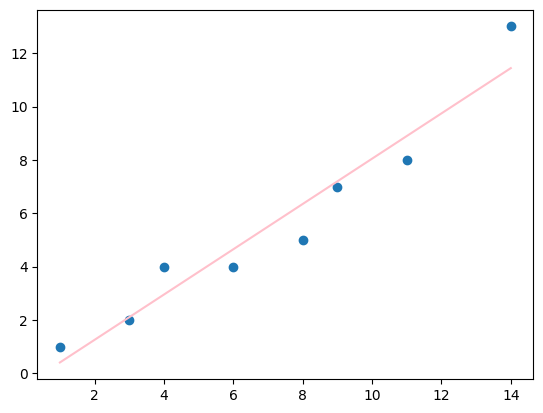

In [43]:
# Your code here.

x = party_df[['X']]
y = party_df['Y']

model = linear_model.LinearRegression()
model.fit(x,y)

y_hat = model.intercept_+ model.coef_[0] * x

plt.plot(x.values, y_hat.values, c='pink')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [44]:
# Your response here. 
# it seems that these variables are positively correlated, as the number of invitees increases so does the number of attendees.
model.score(x,y)

0.9316696375519905

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

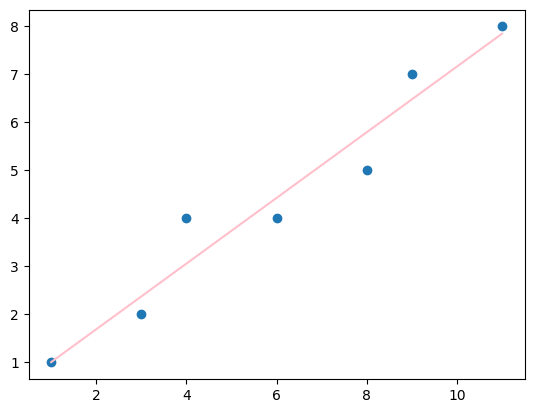

0.9433811802232855

In [47]:
# Your response here. 
party_df = pd.DataFrame({'X': [1,3,4,6,8,9,11], 'Y': [1,2,4,4,5,7,8]})

x = party_df[['X']]
y = party_df['Y']

model = linear_model.LinearRegression()
model.fit(x,y)

y_hat = model.intercept_+ model.coef_[0] * x

plt.plot(x.values, y_hat.values, c='pink')
plt.scatter(x,y)
plt.show()

model.score(x,y)


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# when i removed the outlier the model score became closer to 1, making it more reliable.